<a href="https://colab.research.google.com/github/bhushangirase9112/Face-Recognition-Project/blob/main/Face_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  """Helper function to plot a gallery of portraits"""
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=0.1, right=.99, top=.90,  hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dir_name="/content/drive/MyDrive/Dataset/dataset/faces/"
y=[];
X=[]#np.array(X)
target_names=[]#np.array(target_names)
person_id=0
h=w=300
n_samples=0
class_names=[]#np.array(class_names)
for person_name in os.listdir(dir_name):
  dir_path = dir_name+person_name+"/"

  #class_names.append(person_name)
  class_names = np.append(class_names, person_name)


  for image_name in os.listdir(dir_path):

    #formulate the image path
    image_path = dir_path + image_name

    #Read the input image
    img = cv2.imread(image_path)

    #Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Resize image to 300*300 dimension
    resized_image=cv2.resize(gray,(h,w))

    #Convert matrix to vector
    v = resized_image.flatten()
    X.append(v)
    #X = np.vstack([X, v])

    #increas the no. of samples
    n_samples = n_samples + 1

    #Adding the categorical label
    y.append(person_id)

    #Adding the person name
    #target_names.append(person_name)
    target_names = np.append(target_names, person_name)


  #Increase the person id by 1
  person_id=person_id + 1
# ###########################################################################################


#transform list to numpy array
y=np.array(y)
X=np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
print(y.shape,X.shape,target_names.shape)
print("Number of samples: ",n_samples)

n_classes = target_names.shape[0]
#n_classes = len(target_name)
#target_name = np.array(target_name)
#n_classes = len(np.unique(target_name))

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

(450,) (450, 90000) (450,)
Number of samples:  450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


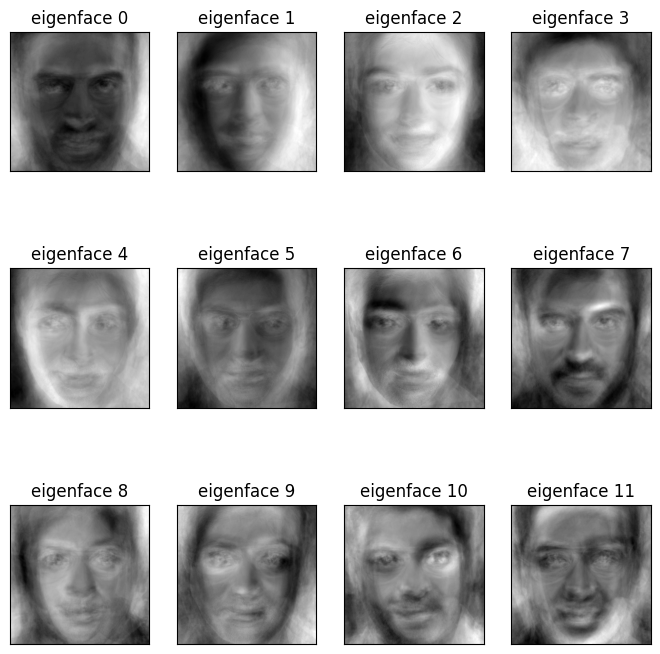

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [7]:
from sklearn.decomposition import PCA
# Split into a training set and a test set using a stratified k fold

# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

##########################################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"% (n_components, X_train.shape[0]))

# Applying PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# Generating eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

# %%Compute Fisherfaces
lda = LinearDiscriminantAnalysis()
# Compute LDA of reduced data
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project done...")

In [9]:
# Training with multi layer perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.20091436
Iteration 2, loss = 3.15366460
Iteration 3, loss = 3.10652200
Iteration 4, loss = 3.06116587
Iteration 5, loss = 3.01711528
Iteration 6, loss = 2.97231020
Iteration 7, loss = 2.93029714
Iteration 8, loss = 2.88806187
Iteration 9, loss = 2.84639820
Iteration 10, loss = 2.80710724
Iteration 11, loss = 2.76733897
Iteration 12, loss = 2.72829689
Iteration 13, loss = 2.69120843
Iteration 14, loss = 2.65378581
Iteration 15, loss = 2.61637434
Iteration 16, loss = 2.58158382
Iteration 17, loss = 2.54575372
Iteration 18, loss = 2.51156210
Iteration 19, loss = 2.47766750
Iteration 20, loss = 2.44469500
Iteration 21, loss = 2.41210825
Iteration 22, loss = 2.38142760
Iteration 23, loss = 2.34969001
Iteration 24, loss = 2.31845126
Iteration 25, loss = 2.28832941
Iteration 26, loss = 2.25839137
Iteration 27, loss = 2.22869533
Iteration 28, loss = 2.19986655
Iteration 29, loss = 2.17104654
Iteration 30, loss = 2.14240270
Iteration 31, loss = 2.11415962
Iteration 32, los

Accuracy: 69.02654867256638


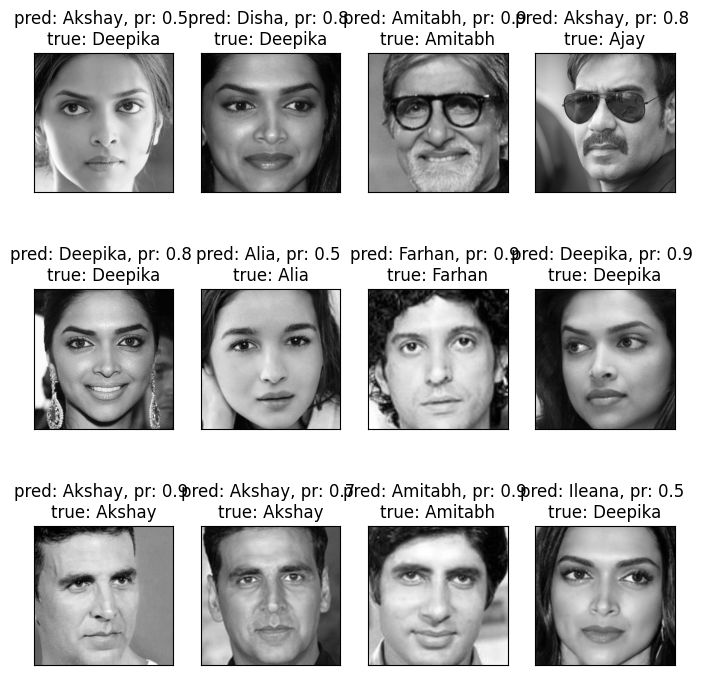

In [10]:
y_pred=[]
y_prob=[]
for test_face in X_test_lda:
  prob = clf.predict_proba([test_face])[0]

  #print(prob,np.max(prob))
  class_id = np.where(prob == np.max(prob))[0][0]
  #print(class_index)
  #Find the label of the method face
  y_pred.append(class_id)
  y_prob.append(np.max(prob))


# Transform the data
y_pred = np.array(y_pred)


preediction_titles=[]
true_positive = 0
for i in range(y_pred.shape[0]):
  #print(y_test[i],y_pred[i])
  # true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
  # pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
  true_name = class_names[y_test[i]]
  pred_name = class_names[y_pred[i]]
  result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)

  preediction_titles.append(result)
  if true_name==pred_name:
    true_positive = true_positive + 1

print("Accuracy:",true_positive*100/y_pred.shape[0])

# Plot result
plot_gallery(X_test, preediction_titles, h, w)
plt.show()